In [15]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [25]:
task_folders = ["results/n_200_fgsm(0.1)", "results/alpha0.5_ni10_n200"]

In [26]:
dfs=[]
for task_folder in task_folders:
    dfs.append(pd.read_csv(os.path.join(task_folder, "results_valid.csv")))

In [27]:
df = pd.concat(dfs, axis=1)

In [28]:
df

,index,index_in_dataset,t_fgsm,t_dlfuzz,valid_fgsm,valid_dlfuzz,index,index_in_dataset,t_lava_vae_forward_gradient,t_lava_vae_bp_gradient,...,mse_lava_cvae_vanilla,valid_lava_vae_forward_gradient,valid_lava_vae_bp_gradient,valid_lava_vae_vanilla,valid_lava_cae_forward_gradient,valid_lava_cae_bp_gradient,valid_lava_cae_vanilla,valid_lava_cvae_forward_gradient,valid_lava_cvae_bp_gradient,valid_lava_cvae_vanilla
0,0.0,8374.0,1.156020,1.036607,ood,ood,0,8374,1.778693,0.500679,...,NaN,ood,ood,ood,id,id,ood,ood,ood,NaN
1,1.0,6935.0,0.006144,0.763062,NaN,ood,2,5103,1.254479,0.575434,...,NaN,id,id,id,id,id,id,NaN,NaN,NaN
2,2.0,5103.0,0.005400,0.779047,ood,NaN,3,8963,0.963985,0.354952,...,NaN,id,id,id,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,8963.0,0.005438,0.736207,NaN,ood,4,4993,1.246468,0.521255,...,NaN,id,id,id,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,4993.0,0.006048,0.840802,NaN,ood,5,9069,0.422540,0.192972,...,NaN,id,id,id,id,id,id,id,id,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,NaN,NaN,NaN,NaN,NaN,NaN,195,8995,1.379385,0.585246,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,id,id,NaN
167,NaN,NaN,NaN,NaN,NaN,NaN,196,4191,1.767593,0.667799,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,id,id,NaN
168,NaN,NaN,NaN,NaN,NaN,NaN,197,3439,1.116086,0.467775,...,NaN,id,id,id,NaN,NaN,NaN,id,id,NaN
169,NaN,NaN,NaN,NaN,NaN,NaN,198,1558,0.599727,0.251938,...,NaN,id,id,id,id,id,id,id,id,NaN


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 68 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   index                             178 non-null    int64  
 1   index_in_dataset                  178 non-null    int64  
 2   t_fgsm                            178 non-null    float64
 3   t_dlfuzz                          178 non-null    float64
 4   kl_fgsm                           105 non-null    float64
 5   kl_dlfuzz                         157 non-null    float64
 6   ws_fgsm                           105 non-null    float64
 7   ws_dlfuzz                         157 non-null    float64
 8   js_fgsm                           105 non-null    float64
 9   js_dlfuzz                         157 non-null    float64
 10  mse_fgsm                          105 non-null    float64
 11  mse_dlfuzz                        157 non-null    float64
 12  index   

# id_ratio

In [22]:
import numpy as np

In [29]:
valid_columns = [col for col in df.columns if col.startswith("valid")]

valid_ratios = df[valid_columns].apply(lambda col: np.mean([1  if v == "id" else 0 for v in col]))

fgsm            0.000000
dlfuzz          0.222222
lava_vae_f      0.520468
lava_vae_bp     0.497076
lava_vae_v      0.508772
lava_cae_f      0.374269
lava_cae_bp     0.385965
lava_cae_v      0.374269
lava_cvae_f     0.543860
lava_cvae_bp    0.567251
lava_cvae_v     0.070175
dtype: float64


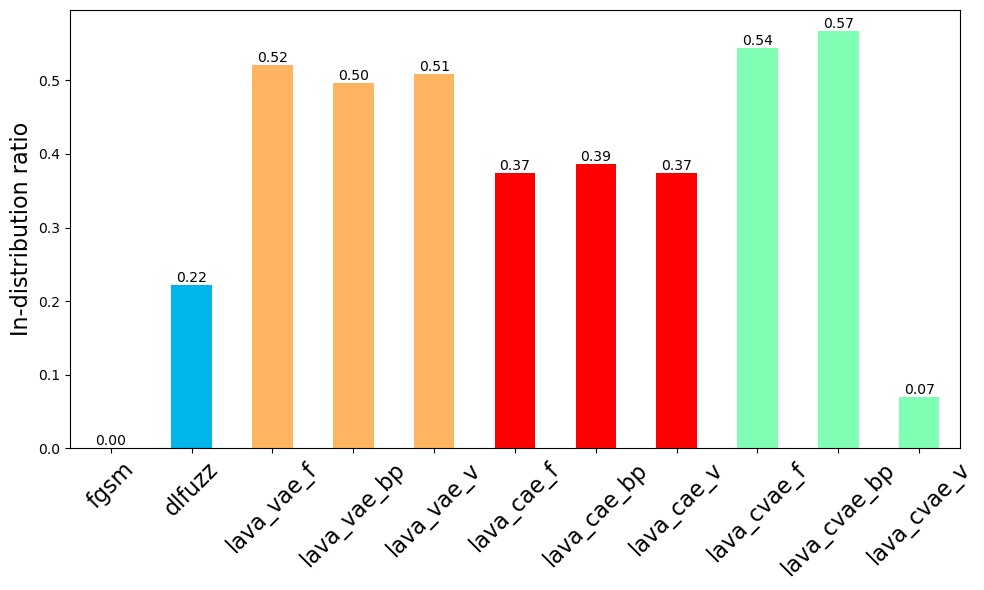

In [32]:
valid_ratios.index = valid_ratios.index.str.replace('valid_', '')
# Rename columns according to the specified rules
valid_ratios.index = valid_ratios.index.str.replace('_forward_gradient', '_f')
valid_ratios.index = valid_ratios.index.str.replace('_bp_gradient', '_bp')
valid_ratios.index = valid_ratios.index.str.replace('_vanilla', '_v')

# Print the average times
print(valid_ratios)

# Define a more detailed colormap for different categories
cmap = cm.get_cmap('rainbow', 5)
color_mapping = {
    'fgsm': cmap(0),
    'dlfuzz': cmap(1),
    'f': cmap(2),
    'bp': cmap(3),
    'v': cmap(4)
}

# Define colors using the colormap based on the categories
colors = []
for col in valid_ratios.index:
    if col == 'fgsm' or col == 'dlfuzz':
        colors.append(color_mapping[col])
    elif 'cvae' in col:
        colors.append(color_mapping['f'])
    elif 'vae' in col:
        colors.append(color_mapping['bp'])
    elif 'cae' in col:
        colors.append(color_mapping['v'])

# Plotting the values as a bar chart without the prefix
plt.figure(figsize=(10, 6))
bars = valid_ratios.plot(kind='bar', color=colors)
plt.ylabel('In-distribution ratio', fontsize=16)
#plt.xlabel('Algorithm')
plt.xticks(rotation=45, fontsize=16)

# Adding the value labels on top of the bars
for bar in bars.patches:
    bars.annotate(f'{bar.get_height():.2f}', 
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                  ha='center', va='bottom')

plt.tight_layout()
plt.savefig('validity_ratio.pdf')
plt.show()